# Thu thập dữ liệu

## Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?

 Nguyên nhân nhóm chọn bộ dữ liệu là do muốn tìm hiểu xu hướng bán vé của ngành công nghiệp điện ảnh, cũng như doanh thu mà các phim mang lại là như thế nào. Xu hướng đi xem phim của mọi người, mọi người thường đi xem phim vào lúc nào trong tuần, có phải mọi người thường xem phim nhiều vào lúc phim mới ra hay không. Đây là những chủ đề rất thú vị mà nhóm em quan tâm.

## Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?

- Bộ dữ liệu cung cấp thông tin chi tiết về lịch sử bán vé của các rạp phim đối với từng phim trong năm 2018. Các thông tin liên quan đến rạp phim và tên phim được mã hóa.
- Nguồn: https://www.kaggle.com/datasets/arashnic/cinema-ticket

## Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm tra thử License của dữ liệu là gì?

**[License: CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)**


# Khám phá dữ liệu

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../datasets/cinemaTicket_Ref.csv")
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


## Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 142524 dòng và 14 cột


## Ý nghĩa của mỗi cột là gì? Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

Ý nghĩa của mỗi cột được nhóm rút ra sau khi quan sát dữ liệu

In [4]:
mean_col = pd.read_csv("../datasets/columns_meaning.csv", index_col = 0)
mean_col['type'] = data.dtypes.to_list()
mean_col

,meaning,type
film_code,Id phim,int64
cinema_code,Id rạp,int64
total_sales,Tổng doanh thu của lần chiếu,int64
tickets_sold,Số lượng vé bán ra,int64
tickets_out,Số lượng vé bị hủy,int64
show_time,Thời gian chiếu phim (Suất chiếu),int64
occu_perc,Tỷ lệ sử dụng ghế trong rạp chiếu phim dựa trên sức chứa có sẵn,float64
ticket_price,Giá vé tại thời điểm chiếu phim,float64
ticket_use,Tổng số vé được sử dụng,int64
capacity,Sức chứa của rạp chiếu phim,float64


Các cột đều có kiểu dữ liệu phù hợp, tuy nhiên cột date đáng lẽ phải có kiểu là datetime lại có kiểu là object, và 2 cột là cinema_code và film_code phải có kiểu dữ liệu là string. Như vậy ta sẽ chuyển kiểu dữ liệu cho 3 cột này.

In [5]:
data['date'] = pd.to_datetime(data['date'])
data[['film_code', 'cinema_code']] = data[['film_code', 'cinema_code']].astype(str)

## Dữ liệu có trùng lặp không

In [6]:
data.duplicated().any()

True

Dữ liệu có trùng lặp, vậy thì ta cùng xem thử những dòng trùng lặp có phải là một lỗi không nhé.

In [7]:
temp_df = data[data.duplicated(keep = False)]
temp_df[temp_df['cinema_code'] == temp_df['cinema_code'].iloc[0]]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
56163,1484,448,324719994,2170,0,13,83.49,149640.55023,2170,2599.113666,2018-03-24,3,1,24
56269,1484,448,324719994,2170,0,13,83.49,149640.55023,2170,2599.113666,2018-03-24,3,1,24


Ở đây ta thực hiện so sánh thử 2 dòng trùng nhau hoàn toàn. Theo quan sát ta có thể thấy dữ liệu có thông tin về rạp, phim, suất chiếu và ngày chiếu. Nhưng mà có vẻ kỳ lạ là trong cùng 1 rạp có 2 suất chiếu cùng thời điểm và các thông tin khác về số vé y hệt nhau, điều này là không thể xảy ra. Vì thế ta suy ra các dòng dữ liệu trên là do cập nhật 2 lần nên bị trùng và thực hiện xóa nó đi.

In [8]:
data = data.drop_duplicates()

## Có dữ liệu nào bị thiếu không?

In [9]:
data.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

Tất cả các cột đều có đầy đủ giá trị, chỉ có cột `occu_perc` và `capacity` bị thiếu 123 giá trị.

In [10]:
data[data.isnull().any(axis=1)]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
8691,1498,181,900000,13,0,3,NaN,69230.769231,13,NaN,2018-08-25,8,3,25
9773,1498,514,2720000,34,0,4,NaN,80000.000000,34,NaN,2018-08-08,8,3,8
9898,1498,477,550000,22,0,1,NaN,25000.000000,22,NaN,2018-08-07,8,3,7
21923,1511,273,250000,5,0,1,NaN,50000.000000,5,NaN,2018-08-11,8,3,11
21972,1511,273,150000,3,0,1,NaN,50000.000000,3,NaN,2018-08-09,8,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138287,1556,543,300000,6,0,1,NaN,50000.000000,6,NaN,2018-09-07,9,3,7
138438,1556,543,150000,3,0,1,NaN,50000.000000,3,NaN,2018-09-06,9,3,6
138570,1556,543,100000,2,0,1,NaN,50000.000000,2,NaN,2018-09-05,9,3,5
138703,1556,543,500000,10,0,1,NaN,50000.000000,10,NaN,2018-09-04,9,3,4


Text(0.5, 1.0, 'capacity')

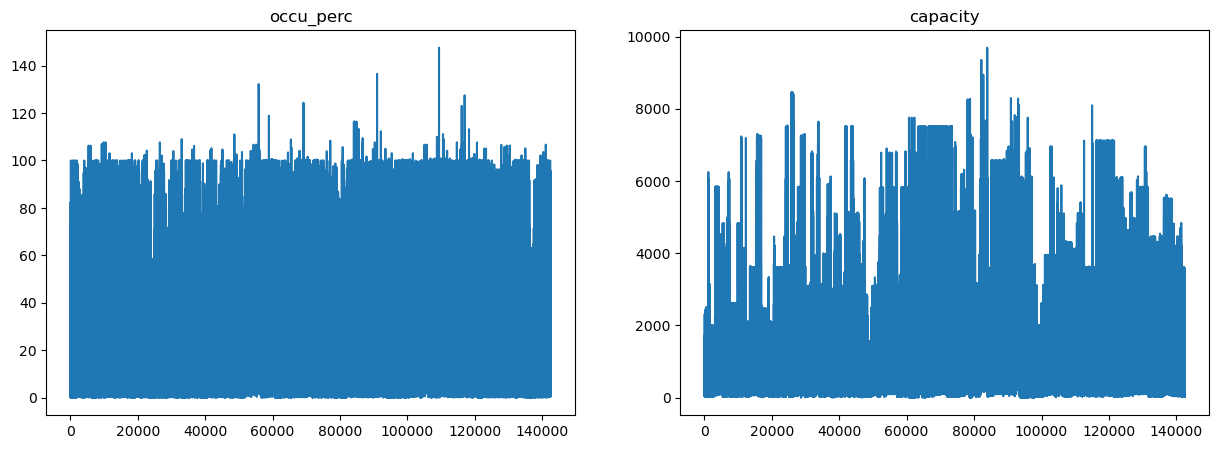

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.plot(data['occu_perc'])
ax1.set_title('occu_perc')

ax2.plot(data['capacity'])
ax2.set_title('capacity')

Dữ liệu ở cột `capacity` không có gì bất thường, tuy nhiên ở cột `occu_perc` có vài giá trị vượt quá mức 100% có nghĩa là tỉ lệ số ghế sử dụng dựa trên sức chứa của rạp > 100% là không chính xác. Ta sẽ xem tỉ lệ này là bao nhiêu.

In [12]:
len(data[data['occu_perc'] > 100]) / len(data) * 100

0.11515398334480192

Tỉ lệ giá trị ở cột `occu_perc` bị vượt mức 100% là 0.115% so với toàn bộ dữ liệu, tỉ lệ này cũng không nhiều và ta có thể gán lại ở mức 100%.

In [13]:
data.loc[data['occu_perc'] > 100, 'occu_perc'] = 100
len(data[data['occu_perc'] > 100]) / len(data) * 100

0.0

Có 123 dòng có giá trị thiếu (thiếu ở cột `occu_perc` và `capacity` là tỷ lệ sử dụng ghế trong rạp chiếu phim dựa trên sức chứa có sẵn và sức chứa của rạp). Chúng ta sẽ điền dữ liệu thiếu bằng giá trị mean.

In [14]:
data['occu_perc'].fillna(data['occu_perc'].mean(), inplace=True)
data['capacity'].fillna(data['ticket_use'] * 100 / data['occu_perc'], inplace=True)

In [15]:
data.to_csv("../datasets/data_preprocess.csv")

## Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

### Đối với cột dữ liệu dạng số

In [16]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [17]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data():
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
min,2.000000e+04,1.0,0.0,1.0,0.00,483.870968,-219.0,-2.000000,2.0,1.0,1.0
lower_quartile,1.260000e+06,18.0,0.0,2.0,3.75,60000.000000,18.0,276.116364,5.0,2.0,8.0
median,3.710000e+06,50.0,0.0,3.0,10.36,79440.559441,50.0,523.525341,7.0,3.0,16.0
upper_quartile,1.110000e+07,143.0,0.0,5.0,28.18,100000.000000,143.0,1037.863796,9.0,3.0,24.0
max,1.262820e+09,8499.0,311.0,60.0,100.00,700000.000000,8499.0,9692.097160,11.0,4.0,31.0


Ta vẽ biểu đồ Boxplot để thể hiện sự phân bố dữ liệu với các cột dạng số.

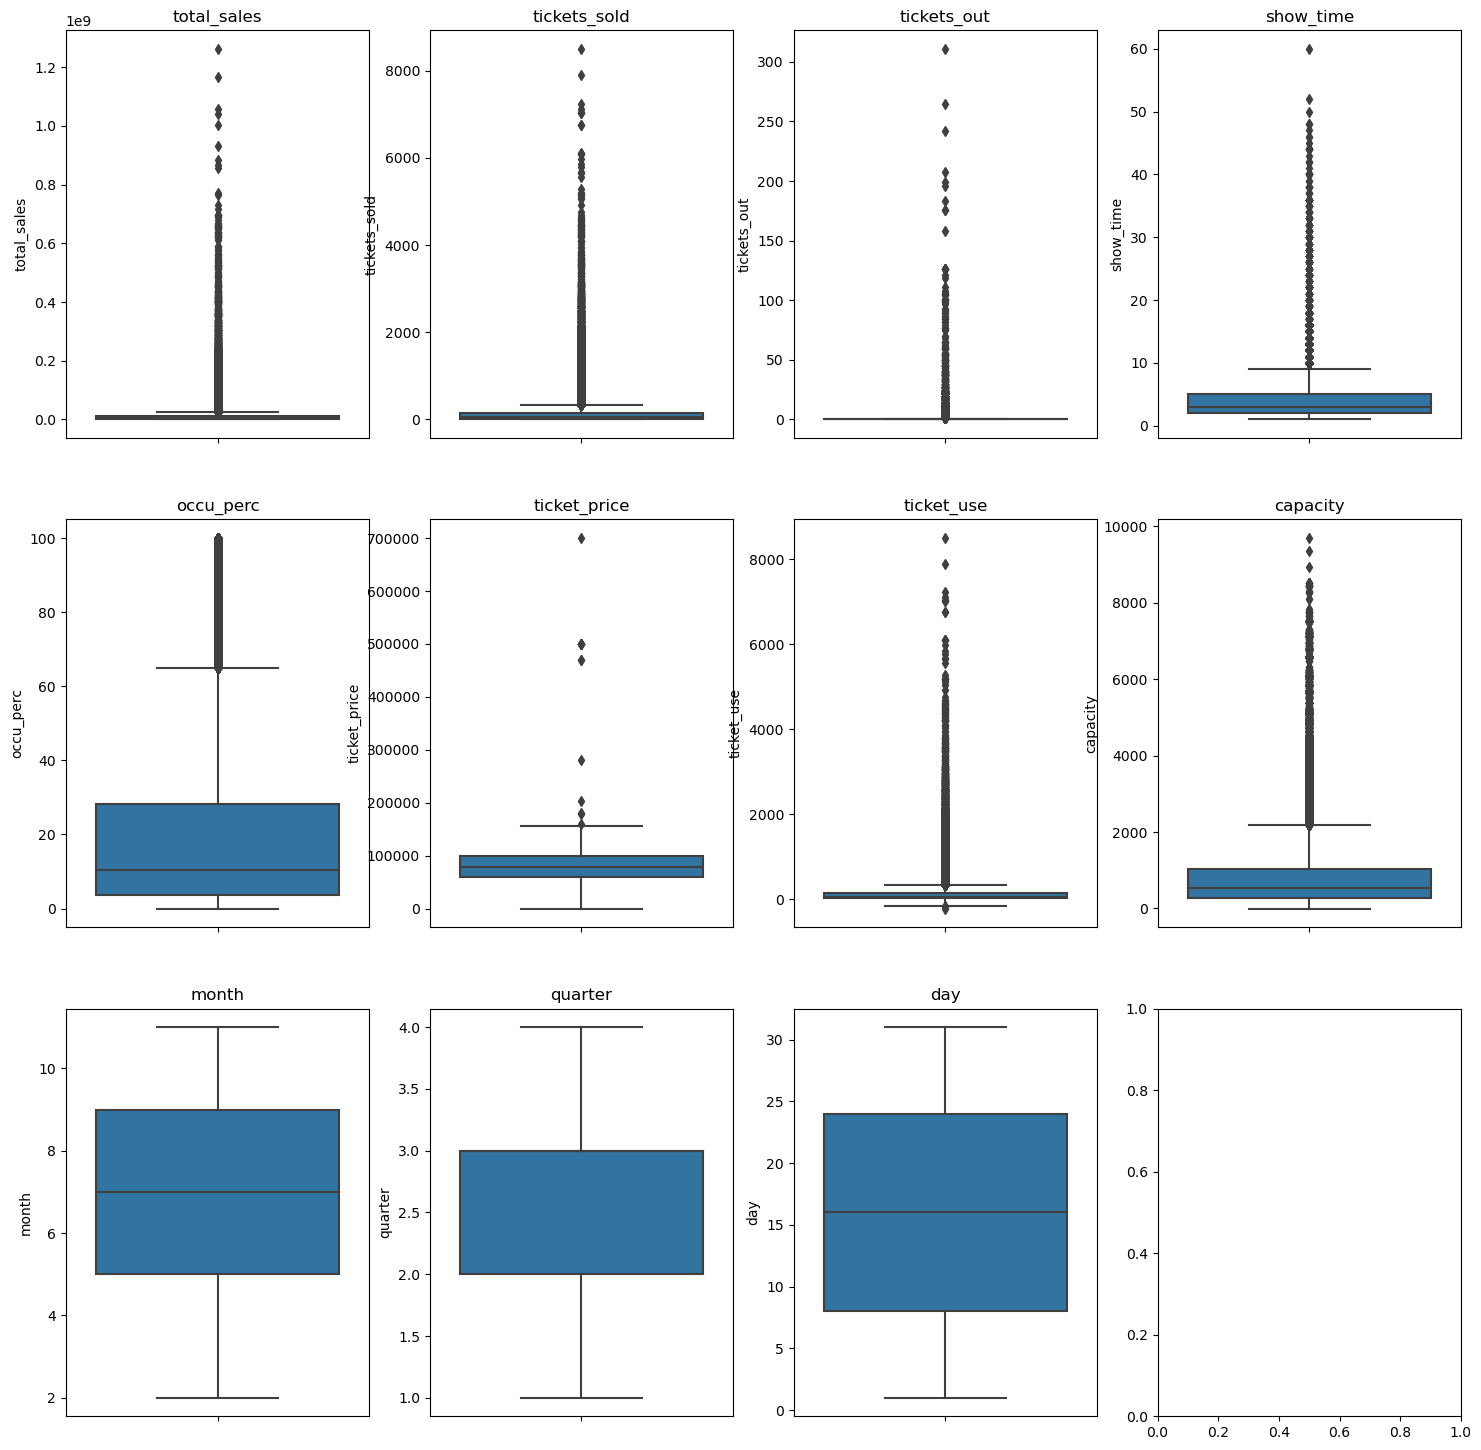

In [18]:
fig, axs = plt.subplots(3, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

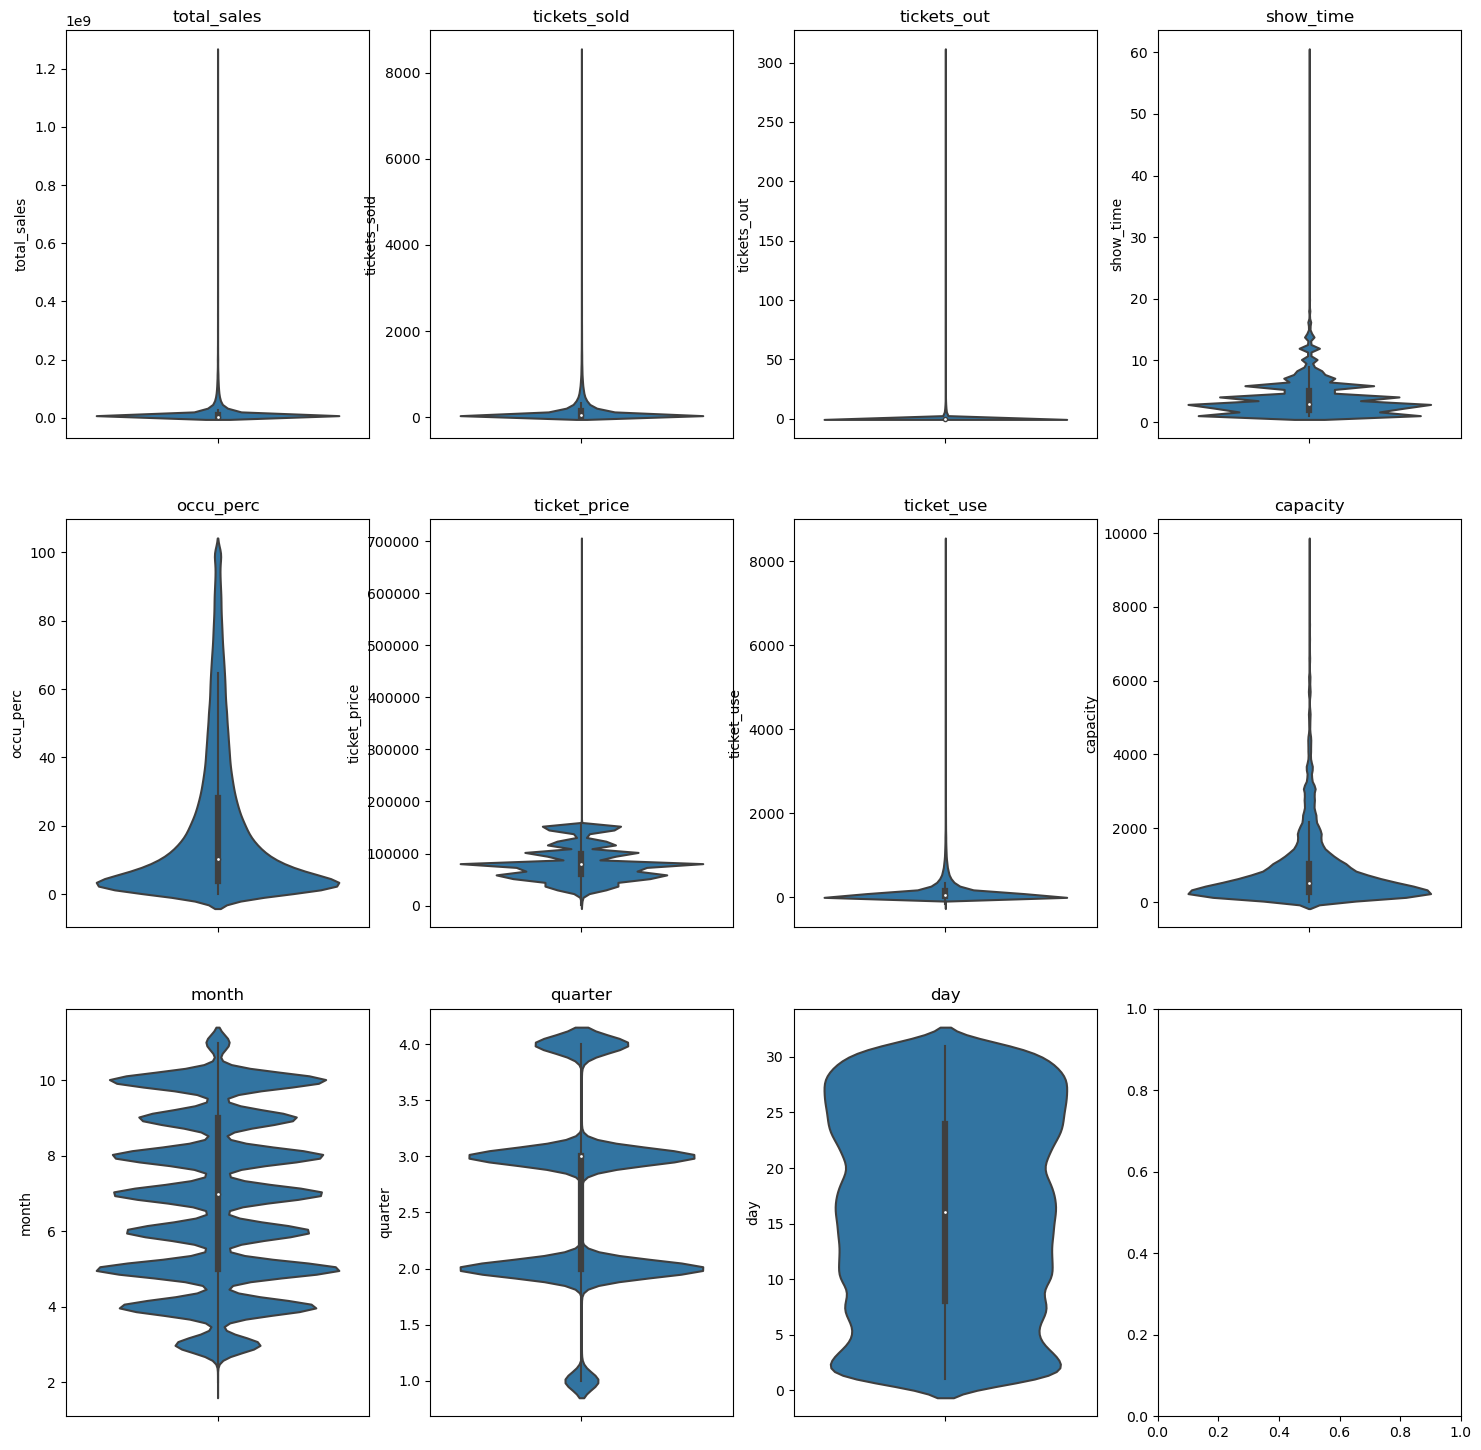

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.violinplot(y = col, data = data, ax=axs[i], orient='h')
    axs[i].set_title(col)
plt.show()

**Nhận xét:**
- Các giá trị ngày tháng phân bố đều trên các khoảng.
- Các giá trị liên quan đến việc bán vé và doanh thu phân bố tập trung ở mức thấp, và có rất nhiều giá trị ngoại lai.
- tickets_out hầu như đều có giá trị 0.
- ticket_price đa số đều có giá trị 80000

### Đối với các cột kiểu categorical

In [20]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [21]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in data.select_dtypes(include=['object']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,film_code,cinema_code
num_values,48,246
value,1471 466 1480 1386 1481 9531 1482 7397 1483 6972 1484 8551 1485 6096 1486 2294 1492 1086 1493 10491 1494 6022 1495 2958 1496 1443 1497 3911 1498 5547 1499 5188 1500 633 1502 601 1511 3254 1512 565 1550 678 1551 2268 1552 2446 1553 2861 1554 11614 1556 7000 1557 418 1558 3549 1559 3650 1560 931 1562 2144 1563 1301 1564 1045 1565 314 1566 558 1567 285 1568 663 1569 987 1570 341 1571 552 1572 3582 1573 2447 1575 1589 1576 4434 1578 1849 1584 39 1587 414 1589 67 dtype: int64,"115 657 120 395 141 1287 142 1093 144 739 ... 88 802 89 1358 91 301 94 429 98 444 Length: 246, dtype: int64"


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị categorical

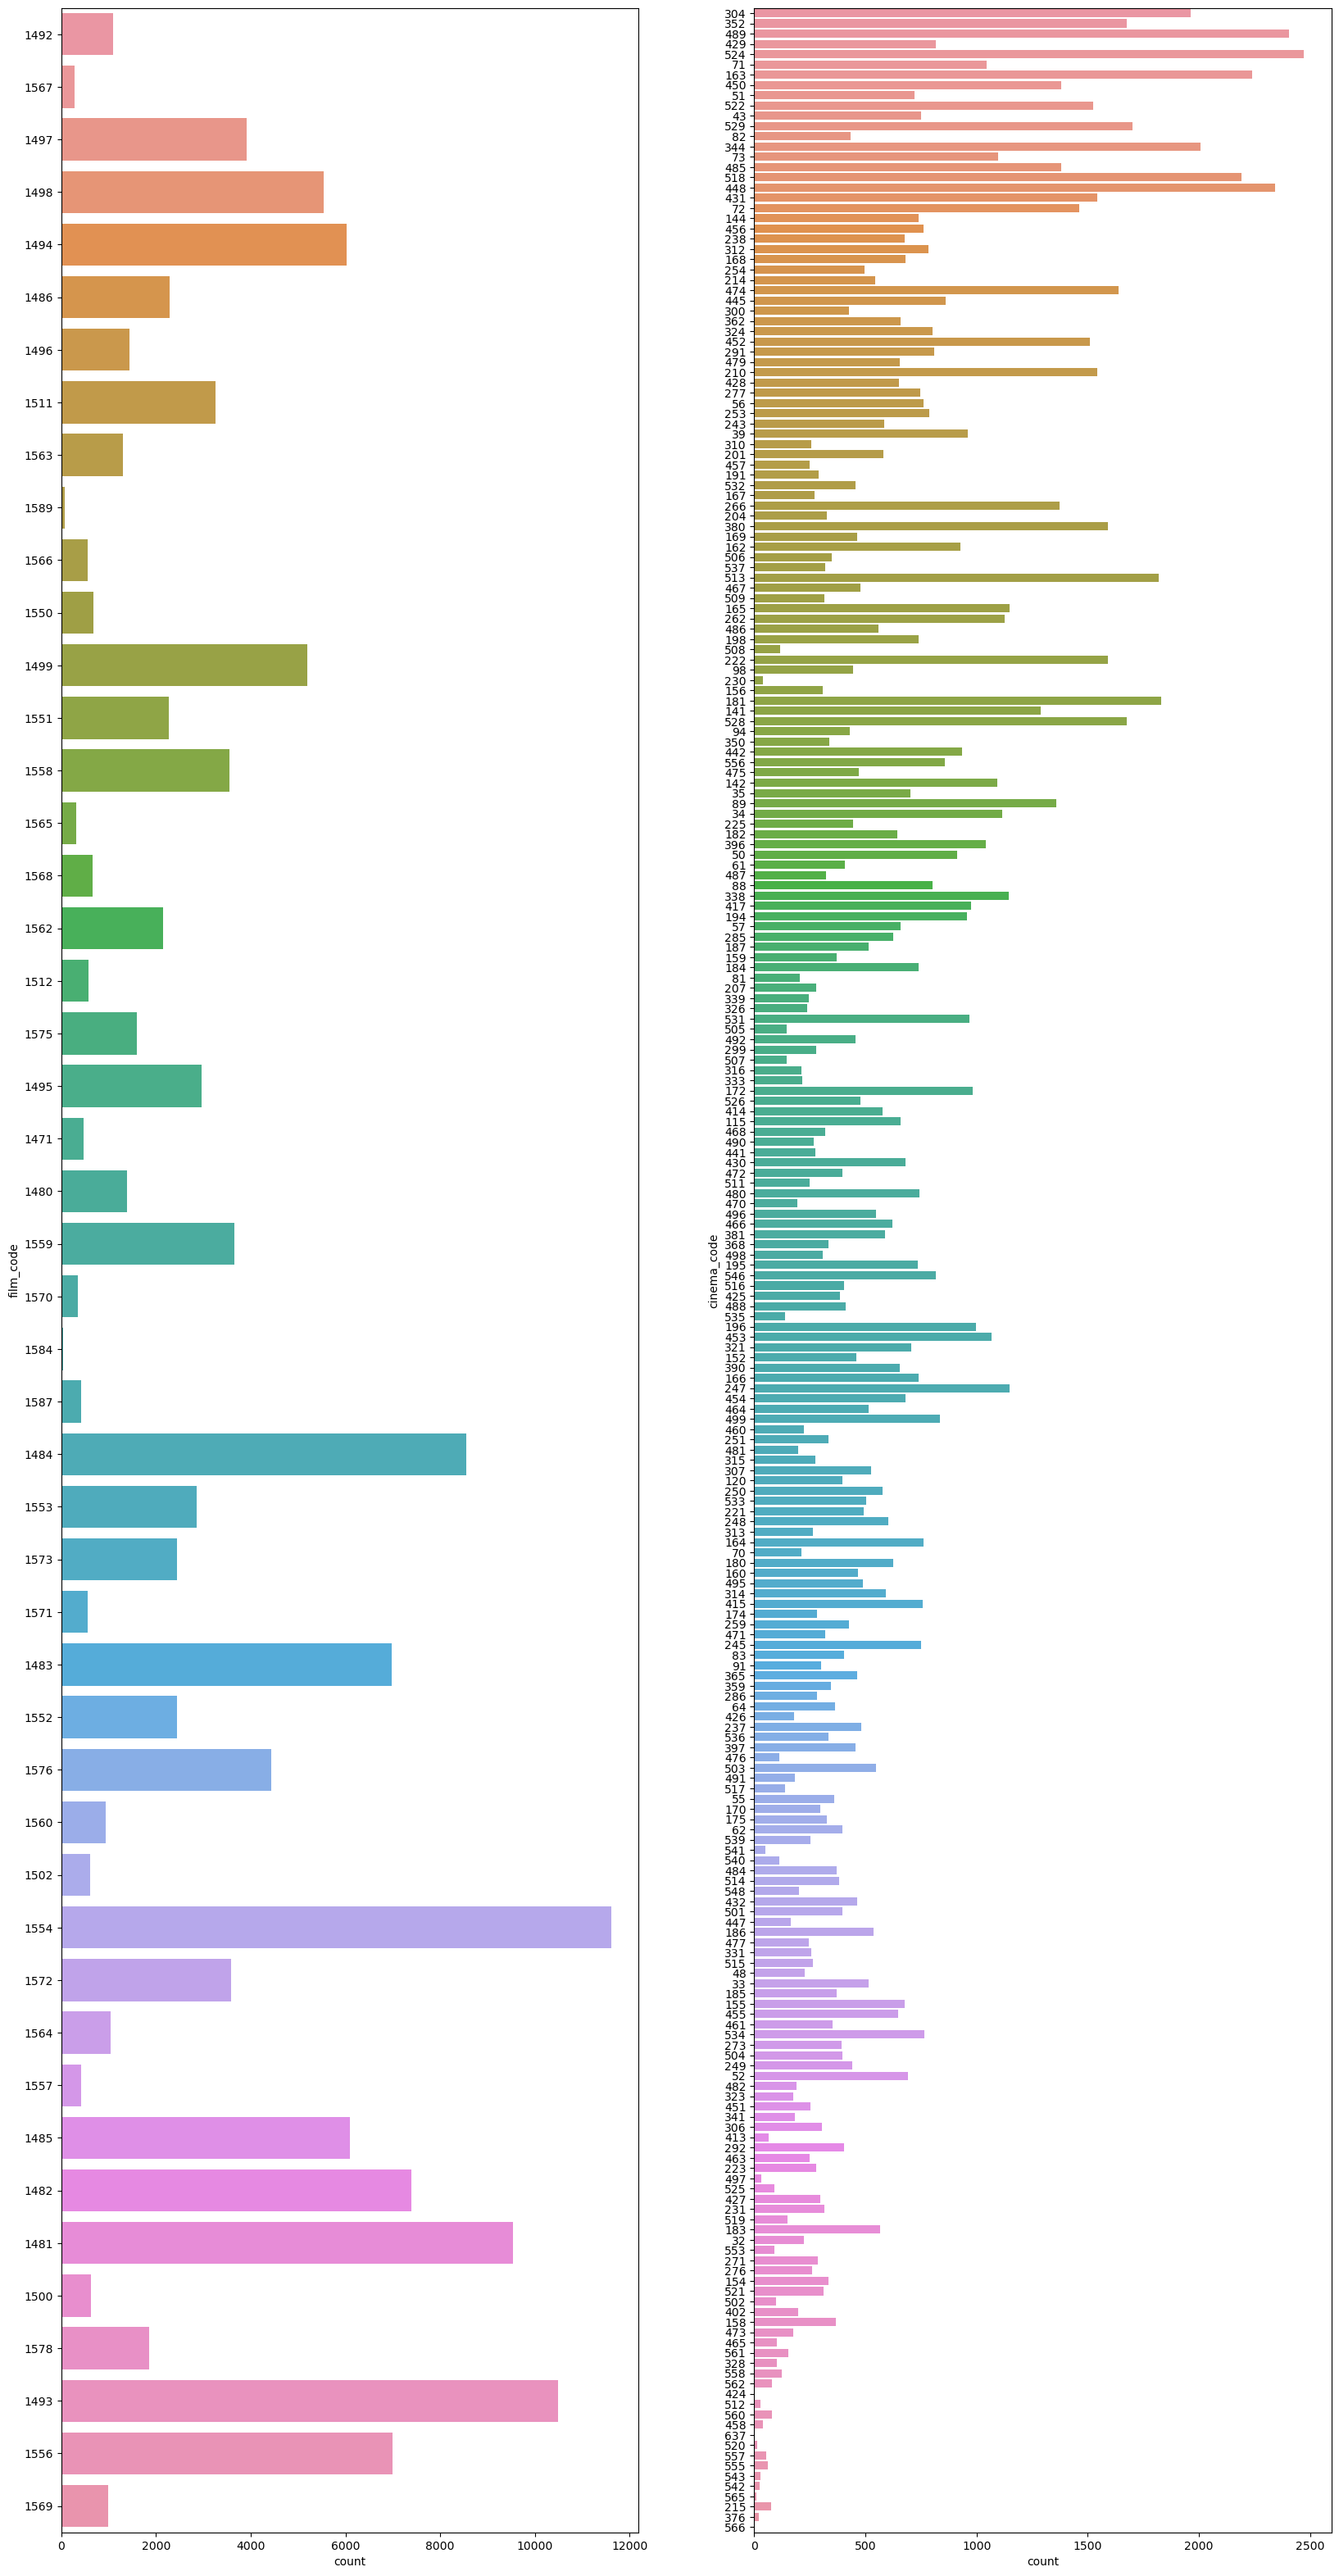

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 40))

axs = axs.flatten()
for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    chart = sns.countplot(data = data, y = col, ax = axs[i])
plt.show()

**Nhận xét:**
- Bộ dữ liệu có tổng cộng 48 phim khác nhau và được tổng hợp dữ liệu bán vè từ 246 rạp chiếu phim.
- Không có tiêu chuẩn nào để nhận xét sự phân bố dữ liệu của 2 trường này.
- Số lượng giá trị của mỗi trường hay tần suất của mỗi giá trị trong trường không tuân theo bất kỳ nguyên tắc nào, hơn nữa, đây đều là những giá trị mã hóa, không mang lại ý nghĩa gì.
- Vậy nên chúng ta không cần quan tâm đến sự phân bố dữ liệu của 2 trường này.